# Finance Data Project

This data project will focus on exploratory data analysis of stock prices. The intend of it is to just visualization and pandas skills


## Get the Data

This section uses pandas to directly read data from Google finance.

First we need to start with the proper imports, which we've already laid out for you here.

*Note: You'll need to install [pandas-datareader](https://github.com/pydata/pandas-datareader) which allows you to read stock information directly from the internet. You can find the [documentation](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) here.*


In [2]:
from IPython.display import display, Markdown
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
# Visualisation
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()
%matplotlib inline

## Data

The idea is to see the effect of the latest AI developments on the IT stocks

Get stock information for the following:

* Google
* Amazon
* Microsoft

Please read pandas_datareader [documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for the latest working API


In [3]:
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2023, 4, 1)

In [4]:
google = data.DataReader("GOOGL", 'stooq', start, end)
amazon = data.DataReader("AMZN", 'stooq', start, end)
microsoft = data.DataReader("MSFT", 'stooq', start, end)

In [5]:
# Could also do this for a Panel Object
stocks = 'GOOGL AMZN MSFT'.split()
df = data.DataReader(stocks,'stooq', start, end)
df.head()

Attributes   Close                     High                           Low  \
Symbols      GOOGL    AMZN    MSFT    GOOGL      AMZN      MSFT     GOOGL   
Date                                                                        
2023-03-31  103.73  103.29  288.30  103.890  103.4900  289.2700  101.0400   
2023-03-30  100.89  102.00  284.05  101.155  103.0400  284.4600   99.7800   
2023-03-29  101.39  100.25  280.51  102.490  100.4218  281.1398  100.6500   
2023-03-28  101.03   97.24  275.23  102.450   98.4400  276.1400   99.7400   
2023-03-27  102.46   98.04  276.38  104.760   99.3400  281.4589  101.9273   

Attributes                       Open                      Volume              \
Symbols       AMZN      MSFT    GOOGL    AMZN    MSFT       GOOGL        AMZN   
Date                                                                            
2023-03-31  101.95  283.0000  101.300  102.16  283.73  36863369.0  56750317.0   
2023-03-30  101.01  281.4800  100.910  101.55  284.23  33086183.0  53633398.0   
2023-03-29   98.56  278.4100  102.280   98.69  278.96  28779572.0  49783279.0   
2023-03-28   96.29  272.0451  102.440   98.11  275.79  32057865.0  38720050.0   
2023-03-27   97.08  275.5200  104.615   99.07  280.50  31120864.0  46721296.0   

Attributes              
Symbols           MSFT  
Date                    
2023-03-31  32765976.0  
2023-03-30  25053410.0  
2023-03-29  25087032.0  
2023-03-28  21878647.0  
2023-03-27  26840212.0

# Side note on Multi-Level Indexing

Since this dataframe has multi levels on columns we need to use proper indexing. Please see [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

**Some useful examples, it is important to define axis=1 in this cases, since we have multi indexing along columns**

In [6]:
df

Attributes    Close                       High                           Low  \
Symbols       GOOGL     AMZN     MSFT    GOOGL      AMZN      MSFT     GOOGL   
Date                                                                           
2023-03-31  103.730  103.290  288.300  103.890  103.4900  289.2700  101.0400   
2023-03-30  100.890  102.000  284.050  101.155  103.0400  284.4600   99.7800   
2023-03-29  101.390  100.250  280.510  102.490  100.4218  281.1398  100.6500   
2023-03-28  101.030   97.240  275.230  102.450   98.4400  276.1400   99.7400   
2023-03-27  102.460   98.040  276.380  104.760   99.3400  281.4589  101.9273   
...             ...      ...      ...      ...       ...       ...       ...   
2022-01-07  137.017  162.554  311.123  138.448  165.2430  313.5650  135.7660   
2022-01-06  137.748  163.254  310.964  139.940  164.8000  315.7390  136.5580   
2022-01-05  137.775  164.357  313.446  144.499  167.1260  323.0460  137.6880   
2022-01-04  144.400  167.522  325.954  146.485  171.4000  332.0900  143.7160   
2022-01-03  144.992  170.404  331.643  145.851  170.7040  334.8590  143.7130   

Attributes                        Open                        Volume  \
Symbols        AMZN      MSFT    GOOGL     AMZN     MSFT       GOOGL   
Date                                                                   
2023-03-31  101.950  283.0000  101.300  102.160  283.730  36863369.0   
2023-03-30  101.010  281.4800  100.910  101.550  284.230  33086183.0   
2023-03-29   98.560  278.4100  102.280   98.690  278.960  28779572.0   
2023-03-28   96.290  272.0451  102.440   98.110  275.790  32057865.0   
2023-03-27   97.080  275.5200  104.615   99.070  280.500  31120864.0   
...             ...       ...      ...      ...      ...         ...   
2022-01-07  162.031  307.2110  138.146  163.839  311.233  29760560.0   
2022-01-06  161.937  308.6010  136.998  163.450  310.240  37347420.0   
2022-01-05  164.357  313.0490  144.420  166.883  322.837  54618280.0   
2022-01-04  166.349  323.0950  145.396  170.438  331.723  28399440.0   
2022-01-03  166.160  326.7190  145.055  167.550  332.239  28678940.0   

Attributes                            
Symbols           AMZN          MSFT  
Date                                  
2023-03-31  56750317.0  3.276598e+07  
2023-03-30  53633398.0  2.505341e+07  
2023-03-29  49783279.0  2.508703e+07  
2023-03-28  38720050.0  2.187865e+07  
2023-03-27  46721296.0  2.684021e+07  
...                ...           ...  
2022-01-07  46605900.0  3.302661e+07  
2022-01-06  51957780.0  4.001764e+07  
2022-01-05  64302720.0  4.042964e+07  
2022-01-04  70725160.0  3.298047e+07  
2022-01-03  63869140.0  2.918898e+07  

[313 rows x 15 columns]

In [7]:
# Since for df the "Symbols" row (GOOGL AMZN MSF) group by on "Attributes" row (Close High Low Open Volume)
# we can directly call the Attributes as key
#df.xs(key='Close', axis=1)
# However to call something from "Symbols" row, you need to define the level accordingly
#df.xs(key='GOOGL', axis=1, level='Symbols')

# Side note on Time-Stamp

In this dataframe, the date comes as timestamp however, in case it comes as string please follow the below procedure


In [8]:
#df['timeStamp'] = pd.to_datetime(df['timeStamp'])

#You can further create extra columns if you want

#df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
#df['Month'] = df['timeStamp'].apply(lambda time: time.month)
#df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

#Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

#dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
#df['Day of Week'] = df['Day of Week'].map(dmap)

In [9]:
# However, if you want to use the stock names as key, you can concatenate all individual stock dataframes
stocks_dataframe = pd.concat([google, amazon, microsoft],axis=1,keys=stocks)

In [10]:
stocks_dataframe.head()

GOOGL                                         AMZN            \
               Open     High       Low   Close    Volume    Open      High   
Date                                                                         
2023-03-31  101.300  103.890  101.0400  103.73  36863369  102.16  103.4900   
2023-03-30  100.910  101.155   99.7800  100.89  33086183  101.55  103.0400   
2023-03-29  102.280  102.490  100.6500  101.39  28779572   98.69  100.4218   
2023-03-28  102.440  102.450   99.7400  101.03  32057865   98.11   98.4400   
2023-03-27  104.615  104.760  101.9273  102.46  31120864   99.07   99.3400   

                                        MSFT                              \
               Low   Close    Volume    Open      High       Low   Close   
Date                                                                       
2023-03-31  101.95  103.29  56750317  283.73  289.2700  283.0000  288.30   
2023-03-30  101.01  102.00  53633398  284.23  284.4600  281.4800  284.05   
2023-03-29   98.56  100.25  49783279  278.96  281.1398  278.4100  280.51   
2023-03-28   96.29   97.24  38720050  275.79  276.1400  272.0451  275.23   
2023-03-27   97.08   98.04  46721296  280.50  281.4589  275.5200  276.38   

                        
                Volume  
Date                    
2023-03-31  32765976.0  
2023-03-30  25053410.0  
2023-03-29  25087032.0  
2023-03-28  21878647.0  
2023-03-27  26840212.0

**Set the column name levels**

In [11]:
stocks_dataframe.columns.names = ['Stock Name','Stock Info']

In [12]:
stocks_dataframe.head()

Stock Name    GOOGL                                         AMZN            \
Stock Info     Open     High       Low   Close    Volume    Open      High   
Date                                                                         
2023-03-31  101.300  103.890  101.0400  103.73  36863369  102.16  103.4900   
2023-03-30  100.910  101.155   99.7800  100.89  33086183  101.55  103.0400   
2023-03-29  102.280  102.490  100.6500  101.39  28779572   98.69  100.4218   
2023-03-28  102.440  102.450   99.7400  101.03  32057865   98.11   98.4400   
2023-03-27  104.615  104.760  101.9273  102.46  31120864   99.07   99.3400   

Stock Name                              MSFT                              \
Stock Info     Low   Close    Volume    Open      High       Low   Close   
Date                                                                       
2023-03-31  101.95  103.29  56750317  283.73  289.2700  283.0000  288.30   
2023-03-30  101.01  102.00  53633398  284.23  284.4600  281.4800  284.05   
2023-03-29   98.56  100.25  49783279  278.96  281.1398  278.4100  280.51   
2023-03-28   96.29   97.24  38720050  275.79  276.1400  272.0451  275.23   
2023-03-27   97.08   98.04  46721296  280.50  281.4589  275.5200  276.38   

Stock Name              
Stock Info      Volume  
Date                    
2023-03-31  32765976.0  
2023-03-30  25053410.0  
2023-03-29  25087032.0  
2023-03-28  21878647.0  
2023-03-27  26840212.0

# Visualisation

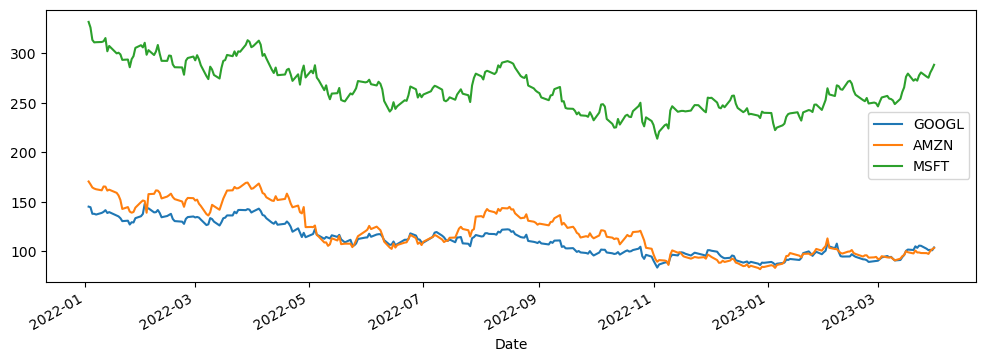

In [13]:
for stock in stocks:
    stocks_dataframe[stock]['Close'].plot(figsize=(12,4),label=stock)
plt.legend()

**Plotly as a more interactive way of plotting the same plot**

In [14]:
stocks_dataframe.xs(key='Close',axis=1,level='Stock Info').iplot()

## Candlegraphs

In [15]:
for stock in stocks:
    stocks_dataframe[stock][['Open', 'High', 'Low', 'Close']].iplot(kind='candle',name=stock,showlegend=True)



In [16]:
def add_moving_averages(stocks, ma_indexes):
    if isinstance(stocks,list):
        for stock in stocks:
            for ma_index in ma_indexes:
                    stock[f'MA {ma_index}'] = stock['Close'].rolling(window=ma_index).mean()
    elif isinstance(stocks,pd.core.frame.DataFrame):
        for ma_index in ma_indexes:
                    stocks[f'MA {ma_index}'] = stocks['Close'].rolling(window=ma_index).mean()
        
                
def plot_moving_averages(stock, ma_indexes):
    #print(stock.name)
    stock['Close'].plot(label='Close')
    for ma_index in ma_indexes:
        stock[f'MA {ma_index}'].plot(figsize=(12,4),label=ma_index)
    plt.legend()

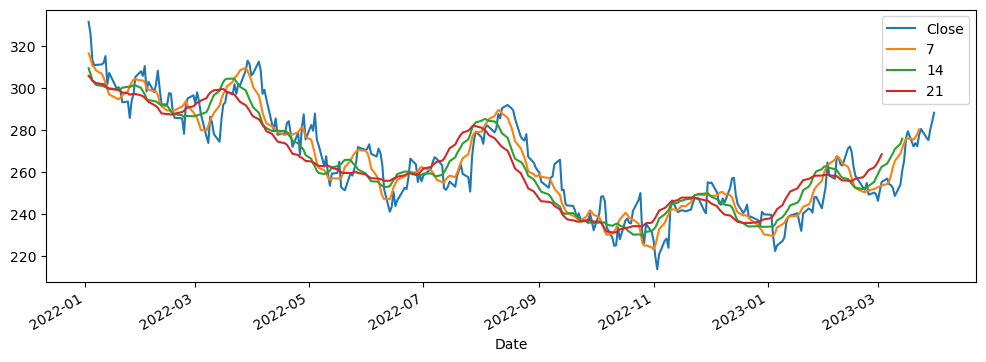

In [17]:
add_moving_averages(microsoft, [7,14,21])
plot_moving_averages(microsoft, [7,14,21])

In [18]:
microsoft['Close'].ta_plot(study='sma',periods=[7,21,50],title='Simple Moving Averages')
microsoft['Close'].ta_plot(study='boll',title='Bollinger Bands')

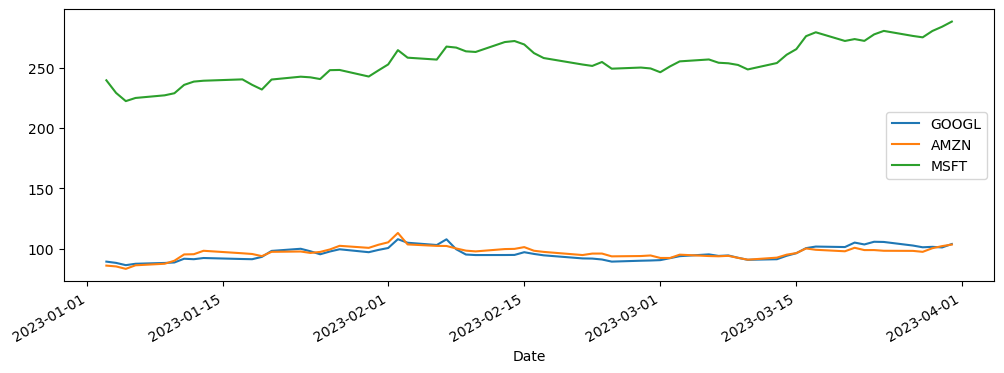

In [19]:
for stock in stocks:
    stocks_dataframe['2023-01-03':'2023-04-01'][stock]['Close'].plot(figsize=(12,4),label=stock)
plt.legend()

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [20]:
returns = pd.DataFrame()

**We can use pandas percentage change method [pct_change](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html) method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame**

In [21]:
for stock in stocks:
    returns[stock+' Return'] = stocks_dataframe[stock]['Close'].pct_change()*100
#returns['Month'] = stocks_dataframe.index.month
index_to_drop = returns.iloc[0].name
returns.drop(index_to_drop, inplace=True)
returns.head()

,GOOGL Return,AMZN Return,MSFT Return
Date,,,
2023-03-30,-2.737877,-1.248911,-1.474159
2023-03-29,0.495589,-1.715686,-1.246259
2023-03-28,-0.355065,-3.002494,-1.882286
2023-03-27,1.415421,0.822707,0.417832
2023-03-24,2.908452,0.091799,1.516029


In [22]:
returns.iplot()

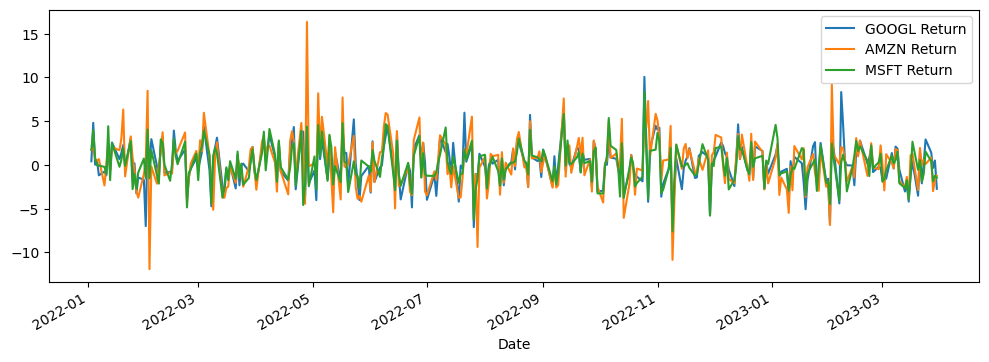

In [23]:
returns.plot(figsize=(12,4),label=stocks)
plt.legend()

In [24]:
returns.max(), returns.idxmax()

(GOOGL Return    10.060044
 AMZN Return     16.345086
 MSFT Return      8.360862
 dtype: float64,
 GOOGL Return   2022-10-25
 AMZN Return    2022-04-28
 MSFT Return    2022-10-25
 dtype: datetime64[ns])

In [25]:
returns.min(), returns.idxmin()

(GOOGL Return    -7.111268
 AMZN Return    -11.922101
 MSFT Return     -7.601415
 dtype: float64,
 GOOGL Return   2022-07-26
 AMZN Return    2022-02-03
 MSFT Return    2022-11-09
 dtype: datetime64[ns])

In [26]:
returns.std() # Amazon is the riskiest

GOOGL Return    2.448325
AMZN Return     3.051028
MSFT Return     2.175186
dtype: float64

**Create a pairplot using seaborn of the returns dataframe.**

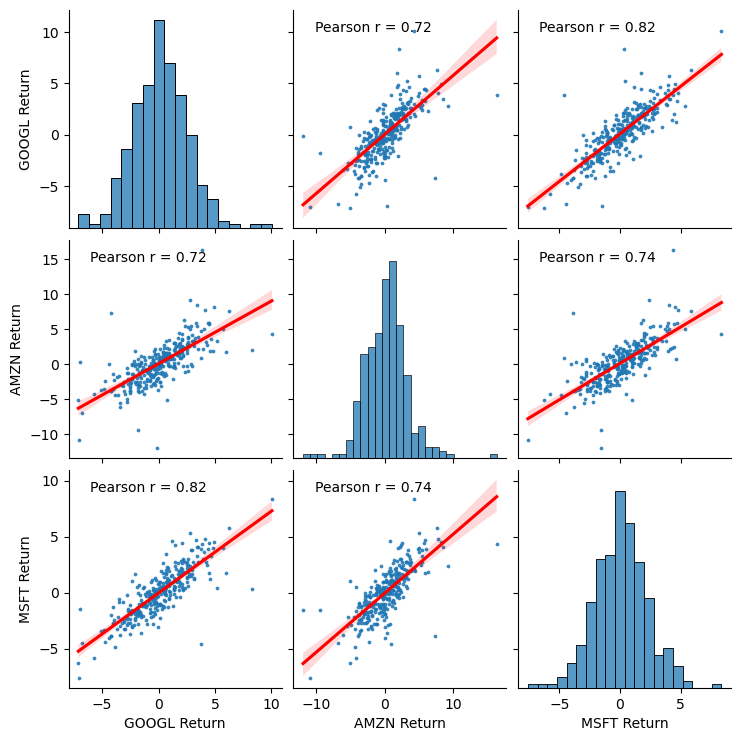

In [63]:

g = sns.pairplot(returns, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s':3} })
for ax in g.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    if xlabel and ylabel:
        corr = returns[[ylabel, xlabel]].corr().iloc[0, 1]
        ax.annotate(f"Pearson r = {corr:.2f}", xy=(.1, .9), xycoords=ax.transAxes)


In [28]:
returns.loc['2023-01-03':'2023-04-01'].max()

GOOGL Return    8.322431
AMZN Return     9.207854
MSFT Return     4.574422
dtype: float64

In [29]:
returns.loc['2023-01-03':'2023-04-01'].std()

GOOGL Return    2.466796
AMZN Return     2.461265
MSFT Return     1.921140
dtype: float64

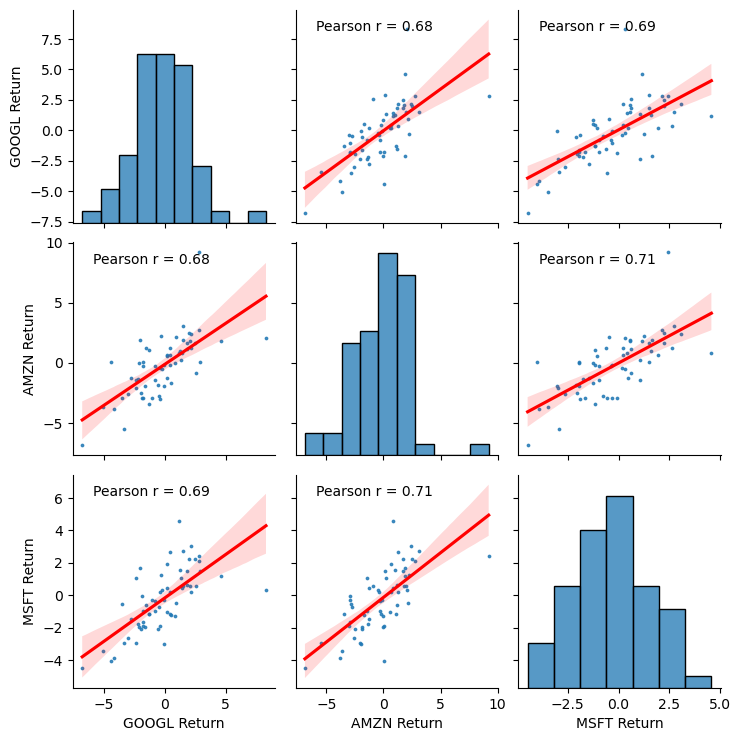

In [30]:
g2 = sns.pairplot(returns.loc['2023-01-03':'2023-04-01'],kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'s':3} })
for ax in g2.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    if xlabel and ylabel:
        corr = returns.loc['2023-01-03':'2023-04-01'][[xlabel, ylabel]].corr().iloc[0, 1]
        ax.annotate(f"Pearson r = {corr:.2f}", xy=(.1, .9), xycoords=ax.transAxes)

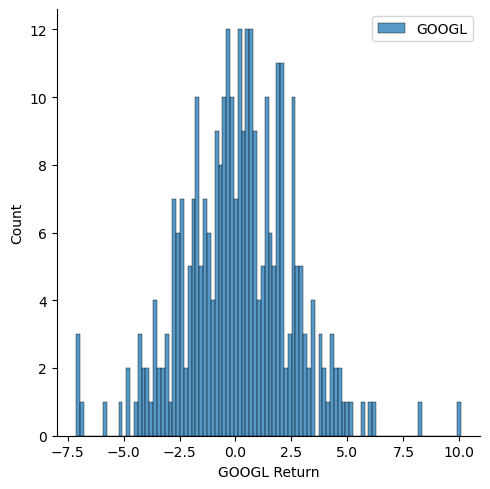

In [57]:
#sns.histplot(returns['GOOGL Return'],bins=100, label='GOOGL')
sns.displot(returns['GOOGL Return'],bins=100, label='GOOGL')
plt.legend()

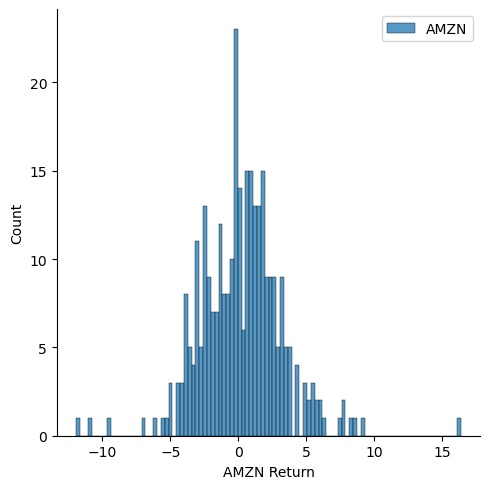

In [59]:
sns.displot(returns['AMZN Return'],bins=100, label='AMZN')
plt.legend()

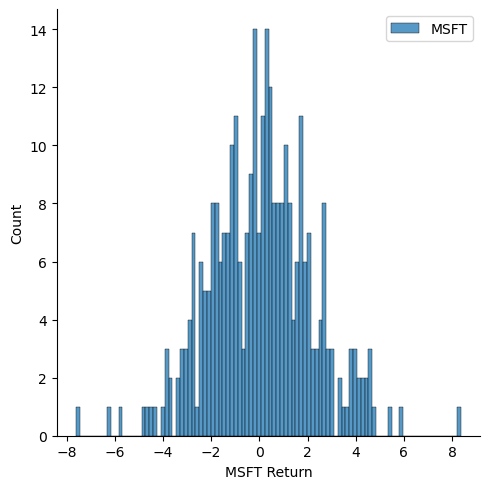

In [58]:
sns.displot(returns['MSFT Return'],bins=100, label='MSFT')
plt.legend()

<AxesSubplot:xlabel='Stock Name', ylabel='Stock Name'>

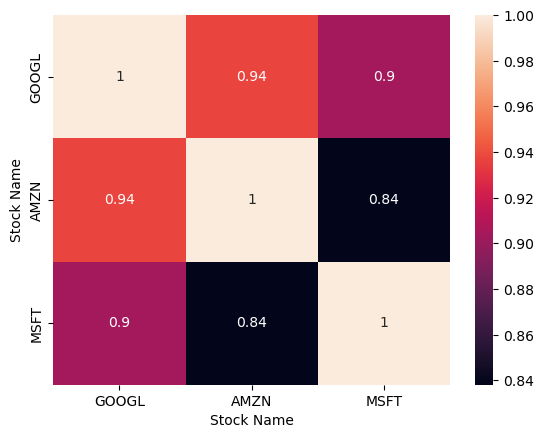

In [60]:
sns.heatmap(stocks_dataframe.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

<AxesSubplot:>

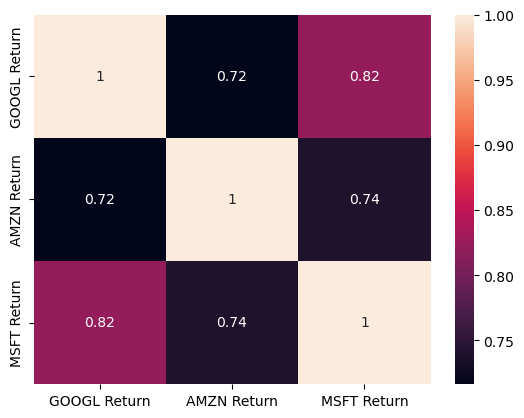

In [64]:
sns.heatmap(returns.corr(),annot=True)

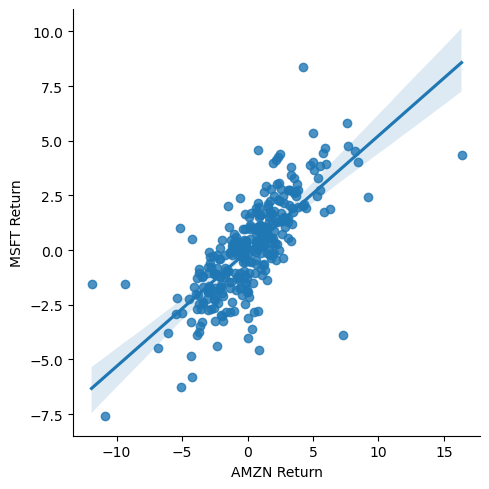

In [65]:
sns.lmplot(x='AMZN Return',y='MSFT Return',data=returns)